In [51]:



import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [52]:

# Function to find the closest centroids for each data point
def findClosestCentroids(centroid, data):
    m = data.shape[0]
    idx = np.zeros((m, 1))
    for i in range(m):
        # Calculate the Euclidean distance between the data point and centroids
        distances = np.linalg.norm(data[i] - centroid, axis=1)
        # Find the index of the closest centroid (cluster)
        idx[i] = np.argmin(distances) + 1  # Adding 1 to make cluster IDs start from 1
    return idx

In [53]:

# Function to compute new centroids based on the assigned clusters
def computeCentroids(idx, data, k):
    n = data.shape[1]
    centroid = np.zeros((k, n))
    for i in range(1, k + 1):
        # Create a binary mask for data points belonging to cluster i
        cluster = (idx == i).astype(int).reshape(-1, 1)
        # Count the number of data points in the cluster
        points_in_cluster = np.count_nonzero(cluster)
        # Multiply the cluster mask with data to get points in the cluster
        cluster = cluster * data
        # Calculate the sum of points in the cluster along each dimension
        total = np.sum(cluster, axis=0)
        # Update the centroid for cluster i
        centroid[i - 1, :] = total / points_in_cluster
    return centroid

In [54]:

def kMeansInitCentroids(data,k):
    m, n = data.shape

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(m)

    # Take the first K examples as centroids
    centroids = data[randidx[:K], :]
    return centroids

In [55]:

def clustering(iteration, k, centroid, data):
    # Loop for the specified number of iterations
    for i in range(iteration):
        # Step 1: Assign each data point to the nearest centroid
        idx = findClosestCentroids(centroid, data)
        
        # Step 2: Recompute the centroids based on the assigned data points
        centroid = computeCentroids(idx, data, k)
    
    # Return the final assignments of data points to clusters and the final centroids
    return idx, centroid


# Image compression with K-means

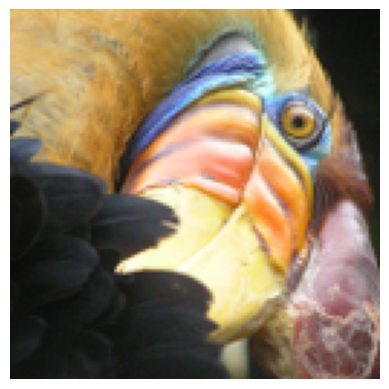

In [56]:

# Load the image data from the .mat file
data_c = scipy.io.loadmat('bird_small.mat')['A']

# Plot the image using matplotlib
plt.imshow(data_c)
plt.axis('off')  # Turn off axis labels
plt.show()


In [57]:

shape=data_c.shape
X_c=data_c.reshape(shape[0]*shape[1],3)

In [58]:

X_c=data_c.reshape(shape[0]*shape[1],3)
K=16
centroid=kMeansInitCentroids(X_c,K)

In [59]:

idx,centroid=clustering(10,16,centroid,X_c)

In [60]:

#  the function to reconstruct the image
def reconstructImage(idx, centroids):
    num_pixels = len(idx)
    reconstructed_image = np.zeros((num_pixels, centroids.shape[1]), dtype=np.uint8)

    for i in range(num_pixels):
        cluster_index = int(idx[i]) - 1  # Cluster index (subtract 1 to match 0-based indexing)
        pixel_color = centroids[cluster_index]
        reconstructed_image[i] = pixel_color

    return reconstructed_image

# Calling the function to reconstruct the image
raw_image = reconstructImage(idx, centroid)

# Reshaping the reconstructed image to its original dimensions (e.g., 168x168x3)
# Replaceing (168, 168, 3) with the actual dimensions of your original image
reconstructed_image = raw_image.reshape((128, 128, 3))



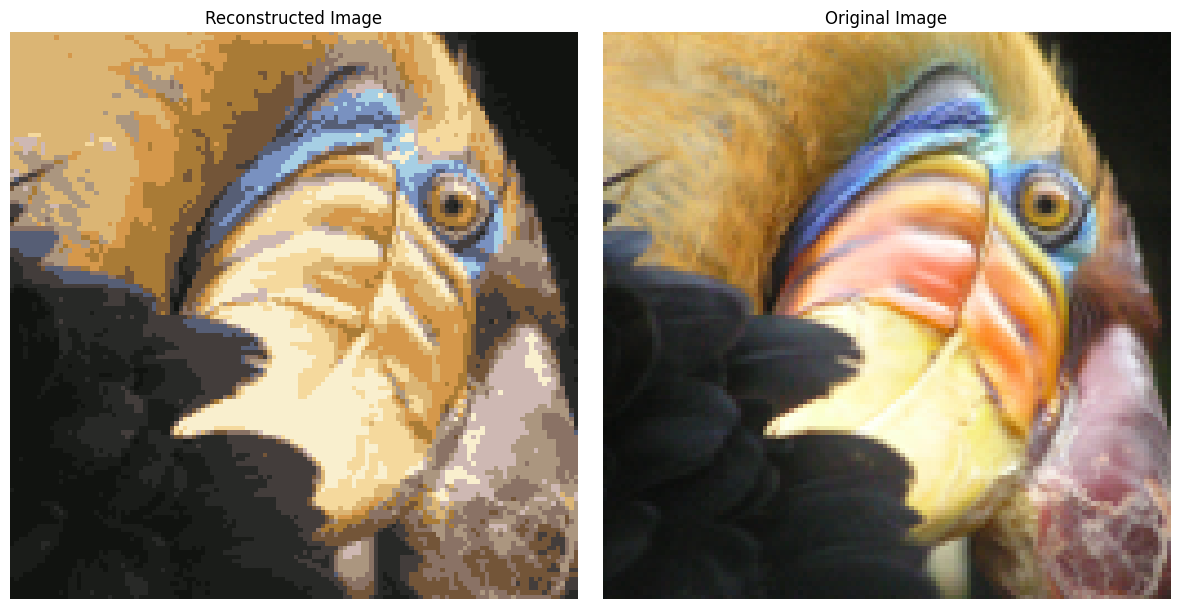

In [61]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first image on the first subplot 
axes[0].imshow(reconstructed_image)
axes[0].axis('off')
axes[0].set_title('Reconstructed Image')

# Plot the second image on the second subplot 
axes[1].imshow(data_c)
axes[1].axis('off')
axes[1].set_title('Original Image')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()